In [1]:
import sys
sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot, simple_concat
from wandb_downloader import RunsDownloader

In [4]:
wandb = RunsDownloader(project="suds-hydra")

In [5]:
results_dir = Path("../../results/cmnist/2v4/mildly_subs_miss_s-0.5cont-more_data/")

baselines = load_data(
    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.01_60epochs.csv",
    results_dir / "cmnist_baseline_dro_color_eta_0.1_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.3_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_1.0_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",

)

In [6]:
ours = wandb.groups(
    "ranking-suds.gated_3discs.mildly_subs_miss_s",
    "kmeans-suds.gated_3discs.mildly_subs_miss_s",
    "no-cluster-suds.gated_3discs.mildly_subs_miss_s",
    "perfect-cluster.gated_3discs.mildly_subs_miss_s",
)
data = simple_concat(ours, baselines)

'ranking-suds.gated_3discs.mildly_subs_miss_s': found 30 runs.
'kmeans-suds.gated_3discs.mildly_subs_miss_s': found 30 runs.
'no-cluster-suds.gated_3discs.mildly_subs_miss_s': found 30 runs.
'perfect-cluster.gated_3discs.mildly_subs_miss_s': found 30 runs.


In [10]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 1.6),
    file_prefix="cmnist_2v4_miss_s",
)

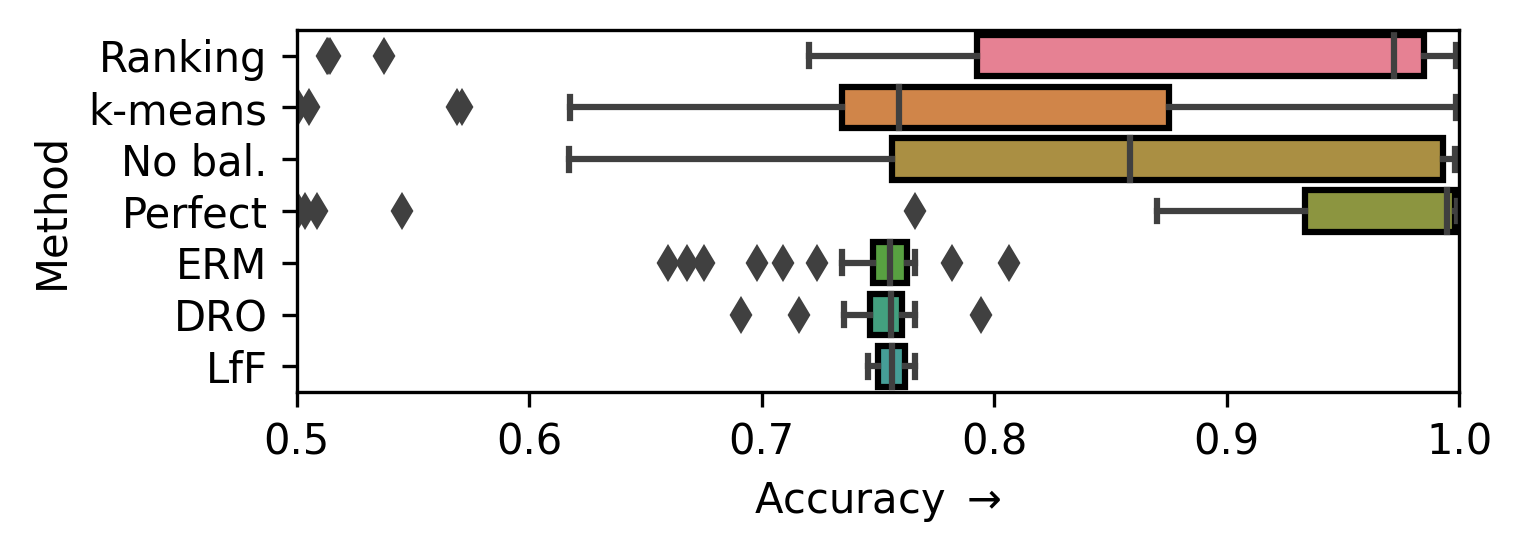

In [11]:
plot(data, metrics=[Metrics.acc], x_limits=(0.5, 1), **plot_kwargs)

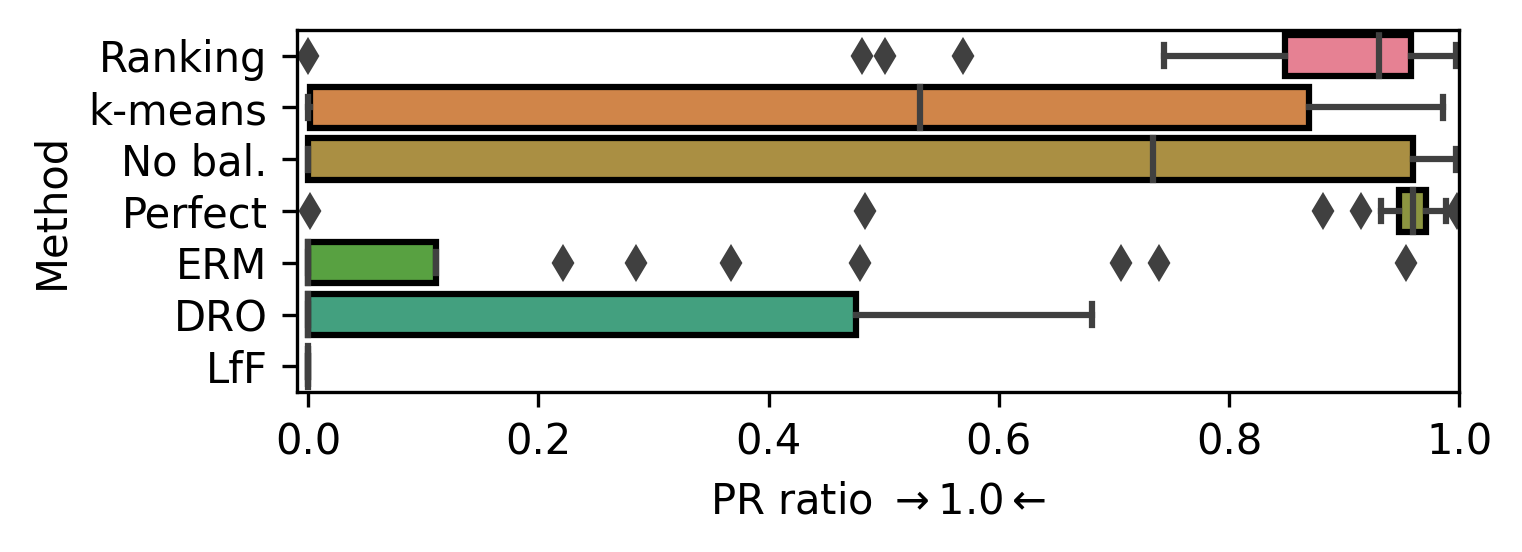

In [12]:
plot(data, metrics=[Metrics.prr], x_limits=(-0.01, 1), **plot_kwargs)

In [14]:
plot(data, metrics=[Metrics.tprr], x_limits=(-0.01, 1), **plot_kwargs)

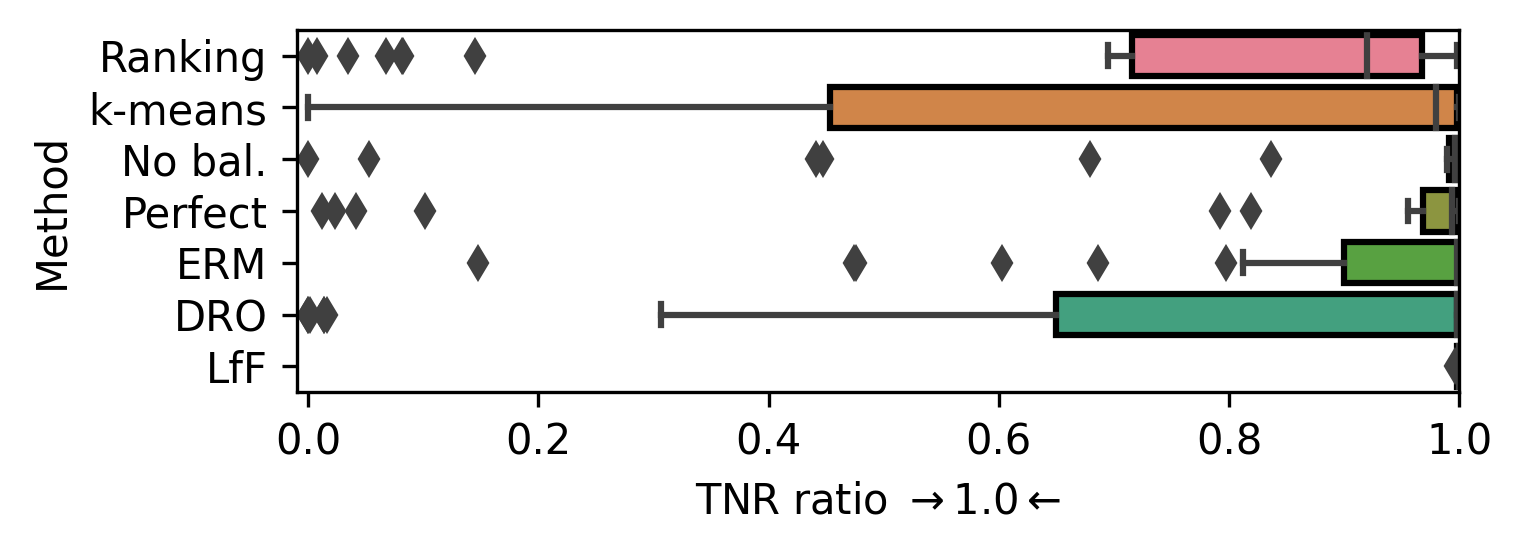

In [15]:
plot(data, metrics=[Metrics.tnrr], x_limits=(-0.01, 1), **plot_kwargs)